In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tv=pd.read_csv("Final_TV.csv")

# For TV SHOW dataset,combined genres, actors to combined Features by the use of Excel to apply cosine similarity

In [3]:
tv.head()

,tconst,titleType,originalTitle,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,actors,Combined_Features
0,tt0039123,tvSeries,Kraft Television Theatre,1947,1958.0,60.0,Drama,8.5,128,"nm0572844,nm0853299,nm0379051,nm0181961,nm0550...","Drama,nm0572844,nm0853299,nm0379051,nm0181961,..."
1,tt0040021,tvSeries,Actor's Studio,1948,1950.0,30.0,Drama,7.3,55,"nm0384696,nm1169111,nm0358449,nm0291507,nm0838...","Drama,nm0384696,nm1169111,nm0358449,nm0291507,..."
2,tt0040036,tvSeries,The Chevrolet Tele-Theatre,1948,1950.0,30.0,Drama,8.4,24,"nm0002143,nm0452128,nm0256207,nm0176235,nm0191...","Drama,nm0002143,nm0452128,nm0256207,nm0176235,..."
3,tt0040041,tvSeries,Texaco Star Theatre Starring Milton Berle,1948,1956.0,60.0,"Comedy,Family",7.7,99,nm0318226,"Comedy,Family,nm0318226"
4,tt0040042,tvSeries,The Morey Amsterdam Show,1948,1950.0,30.0,"Comedy,Family,Music",7.8,24,"nm0025440,nm0138770,nm0839797","Comedy,Family,Music,nm0025440,nm0138770,nm0839797"


In [4]:
tv.shape

(32989, 11)

In [5]:
tv['Combined_Features']=tv['Combined_Features'].apply(lambda x:x.replace(","," "))

In [6]:
tv.sort_values(by=['averageRating'],ascending=False,inplace=True)

In [7]:
tv.head()

,tconst,titleType,originalTitle,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,actors,Combined_Features
15034,tt11735822,tvMiniSeries,The Re-Up,2020,NaN,NaN,Drama,10.0,5,"nm4324692,nm11392283,nm6703521,nm9752230,nm103...",Drama nm4324692 nm11392283 nm6703521 nm9752230...
14954,tt11651564,tvMiniSeries,The Exorcists,2018,NaN,7.0,Comedy,10.0,6,"nm10439670,nm4503186,nm10064224,nm9582703,nm10...",Comedy nm10439670 nm4503186 nm10064224 nm95827...
15133,tt11852070,tvMiniSeries,Code Green,2019,NaN,NaN,Comedy,10.0,7,"nm11404045,nm8192504,nm11404069,nm0763883,nm11...",Comedy nm11404045 nm8192504 nm11404069 nm07638...
15473,tt12244722,tvMiniSeries,Brawl Stars in Viata Reala,2019,NaN,NaN,Comedy,10.0,6,nm11543707,Comedy nm11543707
14110,tt10758248,tvMiniSeries,FSE Moments (Frustrated Software Engineer Mome...,2016,NaN,NaN,Comedy,10.0,14,"nm9010287,nm9021778,nm9047764,nm9047765,nm9047...",Comedy nm9010287 nm9021778 nm9047764 nm9047765...


Text(0.5, 1.0, 'No of Votes V/s Ratings')

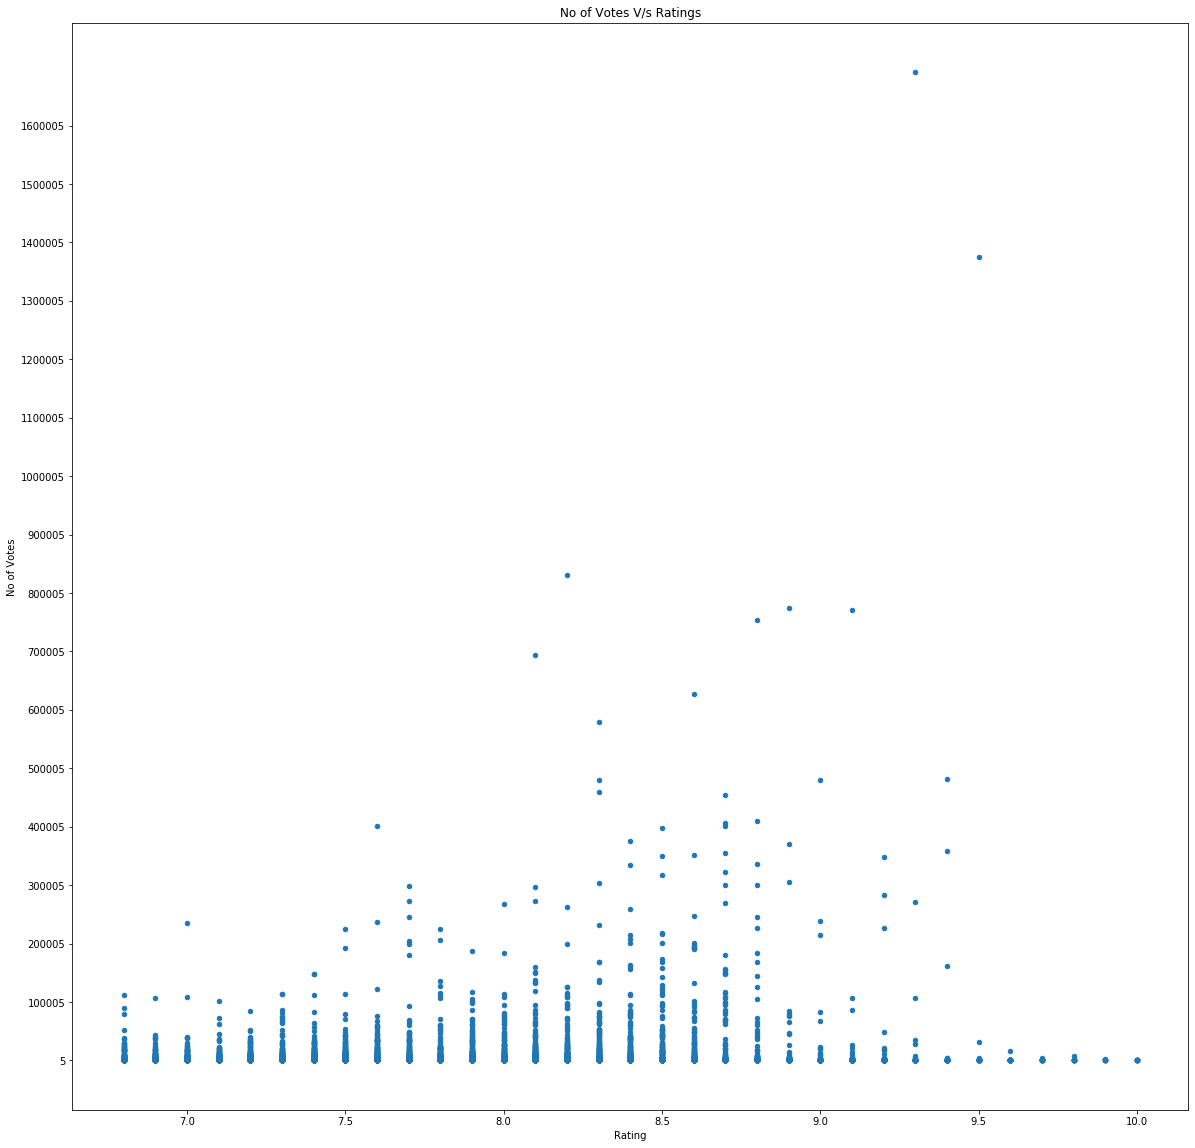

In [8]:
#Plotting scatter plot b/w No of votes and average Rating
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
plt.scatter(tv['averageRating'],tv['numVotes'],s=20)
plt.yticks(np.arange(np.min(tv['numVotes']),np.max(tv['numVotes']),100000))
plt.xlabel('Rating')
plt.ylabel('No of Votes')
plt.title('No of Votes V/s Ratings')

Text(0.5, 1.0, 'No of TV Shows released by Year')

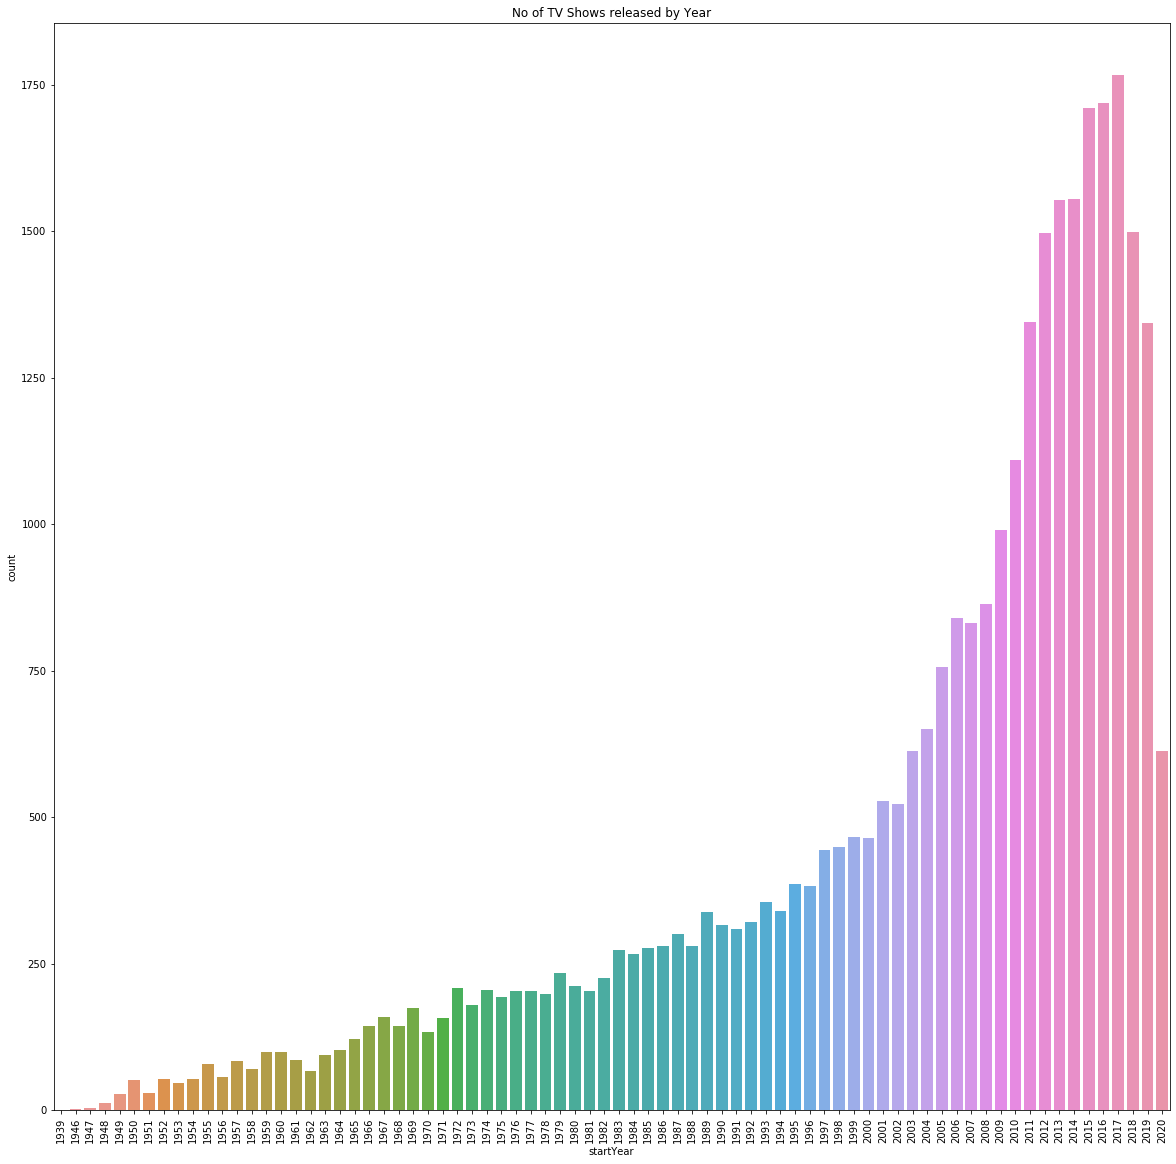

In [9]:
#Plotting countplot for visualising TV Shows released by year
import seaborn as sns
plt.figure(figsize=(20,20))
chart=sns.countplot(x='startYear',data=tv)
plt.xticks(rotation=90)
plt.title("No of TV Shows released by Year")


In [10]:
np.average(tv['numVotes'])

2408.7024765831034

In [11]:
#Dropping numVotes which are less than average of numVotes so that only tv shows with good amount of votes are retained
tv.drop(tv[tv['numVotes']<np.average(tv['numVotes'])].index,inplace=True)

In [12]:
tv.sort_values(by=['averageRating'],ascending=False,inplace=True)

In [13]:
tv.index

Int64Index([31696, 32611, 14004, 30261, 12764, 24608,  6795, 12156,  9459,
             5514,
            ...
            10116,  4267, 27208, 12070,  3348,  6799,  2883,  7301, 32075,
             9035],
           dtype='int64', length=2817)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
#creating a count matrix
cv = CountVectorizer()
count_matrix_tv= cv.fit_transform(tv["Combined_Features"])

In [16]:
#generating the cosine similarity matrix
cosine_sim_tv = cosine_similarity(count_matrix_tv)

In [17]:
tv.reset_index(inplace=True)

In [18]:
tv.drop(columns=['index'],inplace=True)

In [19]:
tv=pd.DataFrame(tv,np.arange(len(tv)))

In [20]:
tv

,tconst,titleType,originalTitle,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,actors,Combined_Features
0,tt8560994,tvSeries,Friday Five Sharp,2015,NaN,NaN,Comedy,9.9,2611,"nm0540997,nm11420982,nm1011472,nm11372396",Comedy nm0540997 nm11420982 nm1011472 nm11372396
1,tt9471404,tvSeries,The Chosen,2017,NaN,NaN,"Drama,History",9.8,7115,"nm5079783,nm6051304,nm0745751,nm4407460,nm5154...",Drama History nm5079783 nm6051304 nm0745751 nm...
2,tt10680606,tvSeries,Minecraft Epic,2019,NaN,NaN,"Action,Adventure,Comedy",9.7,3535,"nm10886893,nm11358693,nm10886895,nm10886896,nm...",Action Adventure Comedy nm10886893 nm11358693 ...
3,tt7450814,tvSeries,Koombiyo,2017,2018.0,20.0,"Crime,Drama,Thriller",9.6,16036,"nm6289365,nm2703889,nm5048092,nm4006110,nm6347...",Crime Drama Thriller nm6289365 nm2703889 nm504...
4,tt0903747,tvSeries,Breaking Bad,2008,2013.0,49.0,"Crime,Drama,Thriller",9.5,1374828,"nm0052186,nm0186505,nm0666739,nm0348152,nm1336...",Crime Drama Thriller nm0052186 nm0186505 nm066...
...,...,...,...,...,...,...,...,...,...,...,...
2812,tt0244926,tvSeries,Rocket Power,1999,2004.0,30.0,"Action,Adventure,Animation",6.8,8061,"nm0039229,nm0289249,nm0440885,nm0120286",Action Adventure Animation nm0039229 nm0289249...
2813,tt0101114,tvSeries,Heartbeat,1992,2010.0,50.0,"Comedy,Crime,Drama",6.8,2466,"nm1874962,nm0800749,nm0288621,nm0672297,nm0430...",Comedy Crime Drama nm1874962 nm0800749 nm02886...
2814,tt0273855,tvSeries,My Wife and Kids,2001,2005.0,30.0,"Comedy,Family",6.8,24769,"nm0711529,nm0001834,nm0132896,nm0330719,nm0571...",Comedy Family nm0711529 nm0001834 nm0132896 nm...
2815,tt8961508,tvSeries,Alta mar,2019,NaN,50.0,"Crime,Drama,Mystery",6.8,4778,"nm2423300,nm1419440,nm2392852,nm4339693,nm0044...",Crime Drama Mystery nm2423300 nm1419440 nm2392...


In [21]:
#Funtions for accessing tv shows from index and vice-versa
def get_title_from_index_tv(index):
    return tv[tv['index'] == index]["originalTitle"].values[0]
def get_index_from_title_tv(title):
    return tv[tv['originalTitle'] == title]["index"].values[0]

In [22]:
tv.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815, 2816],
           dtype='int64', length=2817)

In [23]:
tv['index']=np.arange(len(tv))

In [24]:
tv

,tconst,titleType,originalTitle,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,actors,Combined_Features,index
0,tt8560994,tvSeries,Friday Five Sharp,2015,NaN,NaN,Comedy,9.9,2611,"nm0540997,nm11420982,nm1011472,nm11372396",Comedy nm0540997 nm11420982 nm1011472 nm11372396,0
1,tt9471404,tvSeries,The Chosen,2017,NaN,NaN,"Drama,History",9.8,7115,"nm5079783,nm6051304,nm0745751,nm4407460,nm5154...",Drama History nm5079783 nm6051304 nm0745751 nm...,1
2,tt10680606,tvSeries,Minecraft Epic,2019,NaN,NaN,"Action,Adventure,Comedy",9.7,3535,"nm10886893,nm11358693,nm10886895,nm10886896,nm...",Action Adventure Comedy nm10886893 nm11358693 ...,2
3,tt7450814,tvSeries,Koombiyo,2017,2018.0,20.0,"Crime,Drama,Thriller",9.6,16036,"nm6289365,nm2703889,nm5048092,nm4006110,nm6347...",Crime Drama Thriller nm6289365 nm2703889 nm504...,3
4,tt0903747,tvSeries,Breaking Bad,2008,2013.0,49.0,"Crime,Drama,Thriller",9.5,1374828,"nm0052186,nm0186505,nm0666739,nm0348152,nm1336...",Crime Drama Thriller nm0052186 nm0186505 nm066...,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2812,tt0244926,tvSeries,Rocket Power,1999,2004.0,30.0,"Action,Adventure,Animation",6.8,8061,"nm0039229,nm0289249,nm0440885,nm0120286",Action Adventure Animation nm0039229 nm0289249...,2812
2813,tt0101114,tvSeries,Heartbeat,1992,2010.0,50.0,"Comedy,Crime,Drama",6.8,2466,"nm1874962,nm0800749,nm0288621,nm0672297,nm0430...",Comedy Crime Drama nm1874962 nm0800749 nm02886...,2813
2814,tt0273855,tvSeries,My Wife and Kids,2001,2005.0,30.0,"Comedy,Family",6.8,24769,"nm0711529,nm0001834,nm0132896,nm0330719,nm0571...",Comedy Family nm0711529 nm0001834 nm0132896 nm...,2814
2815,tt8961508,tvSeries,Alta mar,2019,NaN,50.0,"Crime,Drama,Mystery",6.8,4778,"nm2423300,nm1419440,nm2392852,nm4339693,nm0044...",Crime Drama Mystery nm2423300 nm1419440 nm2392...,2815


In [25]:
#Getting a TV-Show user likes, in order to recommend other shows by the help of cosine-similarity matrix
#Note:The TV-Shows recommended to the user are on the basis of Genre and Actors/Actresses
tvshow_user_likes = "The Spy"
tvshow_index = get_index_from_title_tv(tvshow_user_likes)
similar_tvshows = list(enumerate(cosine_sim_tv[tvshow_index]))

In [26]:
#Obtaining 15 TV Shows similar to the show provided by the User
sorted_similar_tvshows = sorted(similar_tvshows,key=lambda x:x[1],reverse=True)[1:]

i=0
print("Top 15 Similar Tv Shows to "+tvshow_user_likes+" are:\n")
for element in sorted_similar_tvshows:
    print(get_title_from_index_tv(element[0]))
    i=i+1
    if i>15:
        break

Top 15 Similar Tv Shows to The Spy are:

House of Saddam
The Looming Tower
Rome
The Knick
Genius
The Terror
The Hot Zone
The Chosen
The Crown
Call the Midwife
China Beach
Deutschland 83
A Haunting
Waco
Medici
Versailles
